In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx
import random
import math
from networkx.algorithms.community.modularity_max import greedy_modularity_communities


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/COSC4086AtulKumar/Datasets/UnweightedDatasets/Facebook2/facebook'
%ls

/content/drive/.shortcut-targets-by-id/1326Cvb8Zr2O5IuqNy1CTAOLw4RosFosO/COSC4086AtulKumar/Datasets/UnweightedDatasets/Facebook2/facebook
0.circles      1684.feat       348.edges       414.featnames
0.edges        1684.featnames  348.egofeat     686.circles
0.egofeat      1912.circles    348.feat        686.edges
0.feat         1912.edges      348.featnames   686.egofeat
0.featnames    1912.egofeat    3980.circles    686.feat
107.circles    1912.feat       3980.edges      686.featnames
107.edges      1912.featnames  3980.egofeat    698.circles
107.egofeat    3437.circles    3980.feat       698.edges
107.feat       3437.edges      3980.featnames  698.egofeat
107.featnames  3437.egofeat    414.circles     698.feat
1684.circles   3437.feat       414.edges       698.featnames
1684.edges     3437.featnames  414.egofeat     facebook2.csv
1684.egofeat   348.circles     414.feat        graphNetworkNegative.csv


In [ ]:
fileList=['0.edges','107.edges', '348.edges', '414.edges', '686.edges', '698.edges', '1684.edges','1912.edges', '3437.edges', '3980.edges'  ]
# fileName='107.edges'
srcDest=[]
for fileName in fileList:
  with open(fileName) as file:
    for lineNumber, i in enumerate(file):
      if i[0]=='#':
        continue
      else:
        srcDest.append(i.split(' '))

for i in range(len(srcDest)):
  if "\n" in srcDest[i][1]:
    srcDest[i][1]=srcDest[i][1][:len(srcDest[i][1])-1]


In [ ]:
len(srcDest)

170174

In [ ]:
srcDest[0:5]

[['236', '186'], ['122', '285'], ['24', '346'], ['271', '304'], ['176', '9']]

In [ ]:
graphNetwork = pd.DataFrame(columns=['u', 'v'])

In [ ]:
for i in range(len(srcDest)):
  edgeRead = {'u': (int)(srcDest[i][0]), 'v':(int)(srcDest[i][1])}
  graphNetwork=pd.concat([graphNetwork, pd.DataFrame(edgeRead, index=[0])], ignore_index=True)


In [ ]:
graphNetwork

,u,v
0,236,186
1,122,285
2,24,346
3,271,304
4,176,9
...,...,...
170169,4031,4027
170170,4002,4027
170171,4031,4013
170172,4028,3996


In [ ]:
graphNetwork.to_csv('facebook2.csv', index=False)

In [ ]:
graphNetwork=pd.read_csv('facebook2.csv')

In [ ]:
len(graphNetwork)

170174

In [ ]:
#checking loops and removing it if found any
listOfLoops = []
countingLoops=0

for i in range(0, len(graphNetwork)):
  if graphNetwork.iloc[i,0]==graphNetwork.iloc[i,1]:
    listOfLoops.append(i)
    
for i in listOfLoops:
    graphNetwork.drop(i, inplace=True)
    countingLoops+=1
print("Number of loops that were existed in the graph: ", countingLoops)

countingLoops=0
for i in range(0, len(graphNetwork)):
  if graphNetwork.iloc[i,0]==graphNetwork.iloc[i,1]:
    countingLoops+=1
print("Number of loops that still exist in the graph: ", countingLoops)

Number of loops that were existed in the graph:  0
Number of loops that still exist in the graph:  0


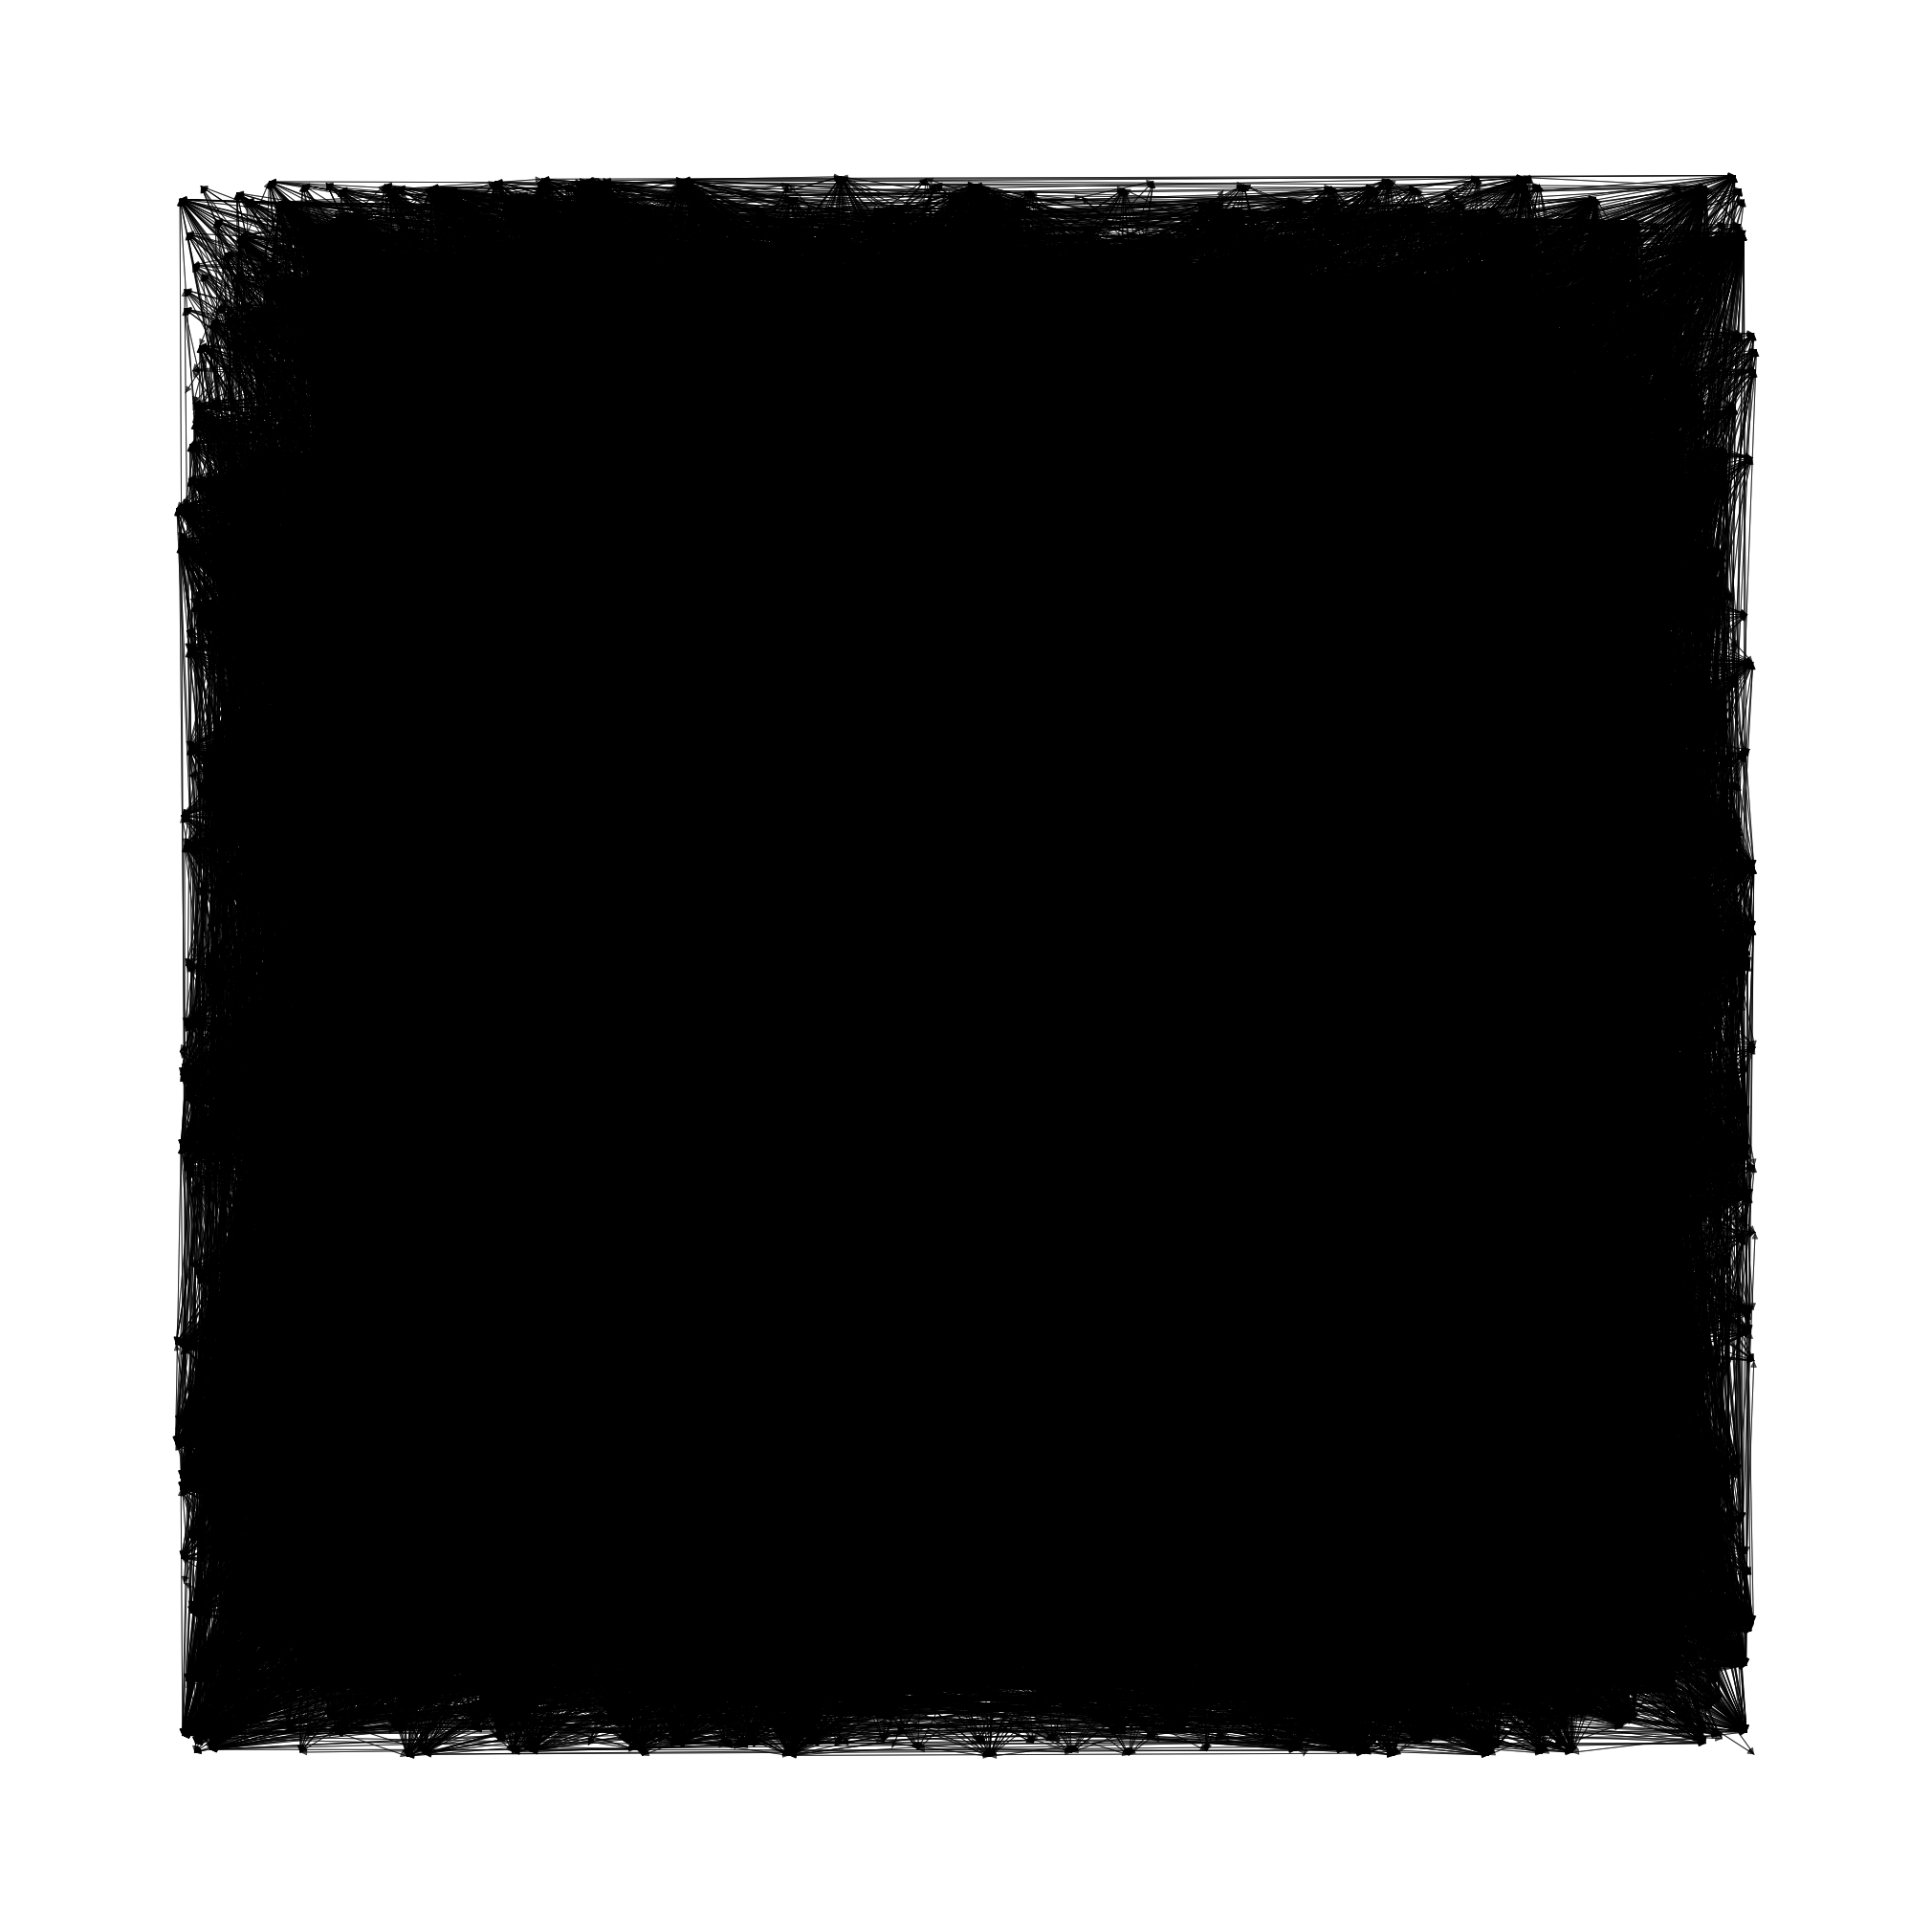

In [ ]:
graph = nx.from_pandas_edgelist(graphNetwork, 'u', 'v', create_using=nx.DiGraph())
plt.figure(figsize=(20,20))
nx.draw(graph, with_labels=False,  pos = nx.random_layout(graph, seed = 46), node_size = 0.0, alpha = 0.6, width = 0.7)
plt.show()

In [ ]:
following = graph.out_degree()
following = list(following)
maxFollowing=(following[0])[1]
node=1
for i in following:
  if maxFollowing < i[1]:
    maxFollowing = i[1]
    node=i[0]
print("Node", node, "has the maximum number of following")

Node 2543 has the maximum number of following


In [ ]:
followers=graph.in_degree()
followers=list(followers)
maxFollowers=(followers[0])[1]
node=1
for i in followers:
  if maxFollowers < i[1]:
    maxFollowers = i[1]
    node=i[0]
print("Node", node, "has the maximum number of followers")

Node 2543 has the maximum number of followers


In [ ]:
# showing the graph is undirected
print("Is the graph undirected? ",following==followers)

Is the graph undirected?  True


In [ ]:
graph = nx.from_pandas_edgelist(graphNetwork, 'u', 'v', create_using=nx.Graph())
# plt.figure(figsize=(20,20))
# nx.draw(graph, with_labels=False,  pos = nx.random_layout(graph, seed = 46), node_size = 0.0, alpha = 0.6, width = 0.7)
# plt.show()

In [ ]:
graph.degree()

DegreeView({236: 36, 186: 43, 122: 62, 285: 46, 24: 15, 346: 26, 271: 72, 304: 54, 176: 13, 9: 56, 130: 15, 329: 29, 204: 21, 213: 38, 252: 64, 332: 42, 82: 33, 65: 11, 276: 17, 26: 67, 280: 42, 272: 44, 211: 29, 199: 46, 84: 12, 133: 17, 62: 25, 239: 58, 172: 40, 322: 71, 53: 30, 3: 16, 170: 45, 175: 16, 46: 4, 56: 77, 254: 16, 194: 18, 231: 20, 117: 5, 127: 15, 135: 9, 103: 15, 188: 47, 23: 16, 116: 16, 73: 9, 299: 19, 288: 3, 315: 55, 119: 61, 323: 38, 48: 21, 57: 14, 200: 56, 98: 48, 313: 36, 63: 5, 344: 8, 67: 75, 118: 35, 325: 38, 277: 64, 134: 18, 270: 3, 76: 2, 36: 10, 223: 26, 274: 13, 88: 19, 21: 64, 339: 26, 108: 12, 197: 15, 169: 37, 275: 9, 273: 8, 83: 6, 28: 12, 312: 25, 242: 23, 214: 16, 20: 14, 307: 3, 71: 2, 333: 7, 207: 2, 168: 10, 308: 23, 341: 11, 128: 27, 334: 27, 238: 22, 265: 26, 141: 27, 78: 8, 345: 15, 317: 6, 158: 24, 38: 8, 302: 19, 27: 4, 54: 7, 139: 8, 109: 36, 291: 35, 142: 42, 203: 56, 105: 13, 232: 24, 64: 6, 217: 7, 248: 20, 126: 6, 224: 27, 261: 37, 28

In [ ]:
numberOfIsolatedNodes=0
for i in graph.nodes():
  if len(list(graph.neighbors(i)))==0:
     numberOfIsolatedNodes=numberOfIsolatedNodes+1
print("Number of isolated nodes: ", numberOfIsolatedNodes)

Number of isolated nodes:  0


In [ ]:
print("Number of nodes in the graph: ", len(graph.nodes()))

Number of nodes in the graph:  3959


In [ ]:
graphNetwork.head()

,u,v
0,236,186
1,122,285
2,24,346
3,271,304
4,176,9


In [ ]:
type(graphNetwork)

pandas.core.frame.DataFrame

In [ ]:
graphNetworkPos=graphNetwork.copy()

In [ ]:
# present edges
graphNetworkPos['Edge_Status']=1

In [ ]:
graphNetworkPos

,u,v,Edge_Status
0,236,186,1
1,122,285,1
2,24,346,1
3,271,304,1
4,176,9,1
...,...,...,...
170169,4031,4027,1
170170,4002,4027,1
170171,4031,4013,1
170172,4028,3996,1


In [ ]:
minU = graphNetworkPos['u'].min()
maxU = graphNetworkPos['u'].max()
minV = graphNetworkPos['v'].min()
maxV = graphNetworkPos['v'].max()
print("'u' column has number from range ",minU,'to', maxU)
print("'v' column has number from range ",minV,'to', maxV)

'u' column has number from range  0 to 4038
'v' column has number from range  0 to 4038


In [ ]:
# absent edges
graphNetworkNeg = pd.DataFrame(columns=['u', 'v', 'Edge_Status'])

In [ ]:
graphNetworkNeg

,u,v,Edge_Status


In [ ]:
# halfPositiveEdges = len(graphNetworkPos)//10000

# while len(graphNetworkNeg)<halfPositiveEdges:  #len(graphNetworkPos)
#   missedU = random.randint(minU, maxU)
#   missedV = random.randint(minV, maxV)
#   while(missedU==missedV):
#     missedV = random.randint(minV, maxV)
#   if missedU in graphNetworkPos['u'].values and missedV in graphNetworkPos['v'].values and nx.has_path(graph, missedU, missedV) and graphNetworkPos.isin({'u':[missedU], 'v':[missedV], 'Edge_Status':[1]}).all(axis=1).any()==False and graphNetworkNeg.isin({'u':[missedU], 'v':[missedV], 'Edge_Status':[0]}).all(axis=1).any()==False and nx.shortest_path_length(graph, source=missedU, target=missedV)>2:
#     newMissedEdge={'u':missedU, 'v':missedV, 'Edge_Status':0}
#     graphNetworkNeg=pd.concat([graphNetworkNeg, pd.DataFrame(newMissedEdge, index=[0])], ignore_index=True)
#     print(len(graphNetworkNeg))

# inverse = graphNetworkNeg.apply(lambda row: pd.Series({'u': row['v'], 'v': row['u'], 'Edge_Status': 0}), axis=1)
# OrgPlusInv=pd.concat([graphNetworkNeg, inverse])
# OrgPlusInv = OrgPlusInv.reset_index(drop=True)
# OrgPlusInv



In [ ]:
# Took more than 2 days to finish the execution
# have alrady some data written int the csv file, so reading from there first and then continuing findin the missing edges.
#generating edges that are not present in the graph (that will be used as negative instances in the dataset)
halfPositiveEdges = len(graphNetworkPos)/2
while len(graphNetworkNeg)<halfPositiveEdges:  #len(graphNetworkPos)
  missedU = random.randint(minU, maxU)
  missedV = random.randint(minV, maxV)
  while(missedU==missedV):
    missedV = random.randint(minV, maxV)
  if missedU in graphNetworkPos['u'].values and missedV in graphNetworkPos['v'].values and nx.has_path(graph, missedU, missedV) and graphNetworkPos.isin({'u':[missedU], 'v':[missedV], 'Edge_Status':[1]}).all(axis=1).any()==False and graphNetworkNeg.isin({'u':[missedU], 'v':[missedV], 'Edge_Status':[0]}).all(axis=1).any()==False and nx.shortest_path_length(graph, source=missedU, target=missedV)>2:
    newMissedEdge={'u':missedU, 'v':missedV, 'Edge_Status':0}
    graphNetworkNeg=pd.concat([graphNetworkNeg, pd.DataFrame(newMissedEdge, index=[0])], ignore_index=True)
    print(len(graphNetworkNeg))


# because of undirected graph, half of the missing edges would be just in opposite direction relative to the generated ones
inverse = graphNetworkNeg.apply(lambda row: pd.Series({'u': row['v'], 'v': row['u'], 'Edge_Status': 0}), axis=1)
OrgPlusInv=pd.concat([graphNetworkNeg, inverse])
OrgPlusInv = OrgPlusInv.reset_index(drop=True)
graphNetworkNeg=OrgPlusInv.copy()



Streaming output truncated to the last 5000 lines.
80088
80089
80090
80091
80092
80093
80094
80095
80096
80097
80098
80099
80100
80101
80102
80103
80104
80105
80106
80107
80108
80109
80110
80111
80112
80113
80114
80115
80116
80117
80118
80119
80120
80121
80122
80123
80124
80125
80126
80127
80128
80129
80130
80131
80132
80133
80134
80135
80136
80137
80138
80139
80140
80141
80142
80143
80144
80145
80146
80147
80148
80149
80150
80151
80152
80153
80154
80155
80156
80157
80158
80159
80160
80161
80162
80163
80164
80165
80166
80167
80168
80169
80170
80171
80172
80173
80174
80175
80176
80177
80178
80179
80180
80181
80182
80183
80184
80185
80186
80187
80188
80189
80190
80191
80192
80193
80194
80195
80196
80197
80198
80199
80200
80201
80202
80203
80204
80205
80206
80207
80208
80209
80210
80211
80212
80213
80214
80215
80216
80217
80218
80219
80220
80221
80222
80223
80224
80225
80226
80227
80228
80229
80230
80231
80232
80233
80234
80235
80236
80237
80238
80239
80240
80241
80242
80243
80244
80245
8

In [ ]:
graphNetworkNeg.to_csv('graphNetworkNegative.csv', index=False)

In [ ]:
graphNetworkNeg=pd.read_csv('graphNetworkNegative.csv')

In [ ]:
graphNetworkNeg

,u,v,Edge_Status
0,2398,3579,0
1,3653,2035,0
2,3926,1344,0
3,743,654,0
4,592,3371,0
...,...,...,...
170169,659,3423,0
170170,2306,1740,0
170171,185,1361,0
170172,3710,2176,0


In [ ]:
graphNetworkP=graphNetworkPos.drop("Edge_Status", axis=1)
graphNetworkN=graphNetworkNeg.drop("Edge_Status", axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train_pos, X_test_pos, y_train_pos, y_test_pos=train_test_split(graphNetworkP, graphNetworkPos['Edge_Status'], test_size=0.2, random_state=42)
X_train_neg, X_test_neg, y_train_neg, y_test_neg=train_test_split(graphNetworkN, graphNetworkNeg['Edge_Status'], test_size=0.2, random_state=42)

In [ ]:
g = nx.from_pandas_edgelist(X_train_pos, 'u', 'v', create_using=nx.DiGraph())

In [ ]:
X_train=pd.concat([X_train_pos, X_train_neg], ignore_index=True)
y_train=pd.concat([y_train_pos, y_train_neg], ignore_index=True)
X_test=pd.concat([X_test_pos, X_test_neg], ignore_index=True)
y_test=pd.concat([y_test_pos, y_test_neg], ignore_index=True)

In [ ]:
X_train

,u,v
0,1139,1672
1,363,580
2,2741,2927
3,1615,1274
4,2533,2543
...,...,...
272273,2104,962
272274,2747,3088
272275,3123,3120
272276,3581,1641


In [ ]:
X_test

,u,v
0,57,184
1,2472,2007
2,2396,2161
3,2266,2638
4,2284,2011
...,...,...
68065,1441,3790
68066,2807,1451
68067,2239,708
68068,1350,3520


In [ ]:
len(y_train)

272278

In [ ]:
Adj=nx.adjacency_matrix(g, nodelist=sorted(g.nodes()))
Adj=Adj.asfptype()
Adj

In [ ]:
from scipy.sparse.linalg import svds, eigs
U, s, V = svds(Adj,k = 6)

#Jaccard Coefficient



In [ ]:
# Jaccard Cofficient for the neighbors
def jaccard_cofficient(u,v):
  try:
    cofficient = (len(set(g.neighbors(u)).intersection(set(g.neighbors(v)))))/(len(set(g.neighbors(u)).union(set(g.neighbors(v)))))
    return cofficient
  except:
     return 0

#Common Neighbor


In [ ]:
# common neighbor score for the neighbors

# (math.sqrt((g.out_degree(u)*g.out_degree(v)))): For normalizing the score
def common_neighbors(u,v):
  try:
    score = (len(set(g.neighbors(u)).intersection(set(g.neighbors(v)))))/(math.sqrt((g.degree(u)*g.degree(v))))
    return score
  except:
     return 0

#Preferential Attachment Score

In [ ]:
# preferential_attachement_score for the neighbors
# (math.sqrt((g.out_degree(u)*g.out_degree(v)))): For normalizing the score
def preferential_attachement_score(u,v):
  try:
    score = (len(set(g.neighbors(u))))*(len(set(g.neighbors(v))))/(math.sqrt((g.degree(u)*g.degree(v))))
    return score
  except:
     return 0

#kNN weights

In [ ]:
import math

In [ ]:
def kNN_weight(node):
  try:
    return 1/(math.sqrt(1+g.neighbors(node)))
  except:
    return 0

In [ ]:
def kNNW_1(u,v):
  try:
    return kNN_weight(u)+kNN_weight(v)
  except:
    return 0

def kNNW_2(u,v):
  try:
    return kNN_weight(u)*kNN_weight(v)
  except:
    return 0

#Sorensen Index

In [ ]:
def sorensen_index(u,v):
  try:
    score = (len(set(g.neighbors(u)).intersection(set(g.neighbors(v)))))/(g.degree(u)+g.degree(v))
    return score
  except:
     return 0

#Salton Cosine Similarity

In [ ]:
def salton_cosine(u,v):
  try:
    score = (len(set(g.neighbors(u)).intersection(set(g.neighbors(v)))))/math.sqrt((g.degree(u)*g.degree(v)))
    return score
  except:
     return 0

#Adamic/Adar Index

In [ ]:
def adamic_adar_index(u,v):
  totalSum=0
  try:
    common_successors=list(set(g.neighbors(u)).intersection(set(g.neighbors(v))))
    for i in range(0,len(common_successors)):
      totalSum=totalSum+ g.degree(common_successors[i])
    if(totalSum!=0):  
      if(1/np.log10(totalSum)==math.inf):
        return 0
      return 1/np.log10(totalSum)
    else:
      return 0
  except:
    return 0

#PageRank

In [ ]:
pageRank = nx.pagerank(g, alpha=0.9, tol=1e-07, max_iter=250)

In [ ]:
len(pageRank)

3955

In [ ]:
pageRankMean=float(sum(pageRank.values())) / len(pageRank)
pageRankMean

0.00025284450063211146

#Katz Centrality Score

In [ ]:
import networkx as nx
from multiprocessing import Pool
from functools import partial
from tqdm import tqdm

def katz_centrality_node(node, alpha, beta, max_iter):
    return (node, nx.katz_centrality_numpy(g, alpha=alpha, beta=beta, normalized=False)[node])

def katz_centrality_parallel(g, alpha=0.01, beta=0.01, max_iter=1000, num_processes=4):
    nodes = list(g.nodes())
    katz_centrality_score = {}

    with Pool(num_processes) as p:
        katz_centrality_score = dict(tqdm(p.imap(partial(katz_centrality_node, alpha=alpha, beta=beta, max_iter=max_iter), nodes), total=len(nodes)))

    return katz_centrality_score


In [ ]:
katz_centrality_score = katz_centrality_parallel(g, alpha=0.01, beta=0.01, max_iter=5000, num_processes=8)


100%|██████████| 3955/3955 [2:45:31<00:00,  2.51s/it]


In [ ]:
katz_centrality_mean=float(sum(katz_centrality_score.values())) / len(katz_centrality_score)
katz_centrality_mean

0.08461161663303624

In [ ]:
X_train

,u,v
0,1139,1672
1,363,580
2,2741,2927
3,1615,1274
4,2533,2543
...,...,...
272273,2104,962
272274,2747,3088
272275,3123,3120
272276,3581,1641


#HITS Score

In [ ]:
hitsScore = nx.hits(g, max_iter=50, tol=1e-08, nstart=None, normalized=True)

In [ ]:
print('min',hitsScore[0][min(hitsScore[0], key=hitsScore[0].get)])
print('max',hitsScore[0][max(hitsScore[0], key=hitsScore[0].get)])
print('mean',float(sum(hitsScore[0].values())) / len(hitsScore[0]))

min -6.5254360544714104e-21
max 0.0060614630252927345
mean 0.00025284450063211135


#Follow Back Edge

In [ ]:
def follows_back(u,v):
  if(g.has_edge(v,u)):
    return 1
  else:
    return 0

#Detecting Community

In [ ]:
def is_same_community(u,v, community_list):
    status=False
    

    for i in range(len(community_list)):
      if u in community_list[i] and v in community_list[i]:
        status=False
        return 1
        break
      if u in community_list[i] and v not in community_list[i]:
        status=False
        return 0
        break
      if u not in community_list[i] and v in community_list[i]:
        status=False
        return 0
        break
      status=True
    
    if status==True:
      return 0


In [ ]:
X_train.head()

In [ ]:
X_test.head()

##Appending all the similarity indices into the dataframe

In [ ]:
#  adding jaccard cofficient to the dataframe

X_train['Jaccard']=X_train.apply(lambda row: jaccard_cofficient(row['u'], row['v']), axis=1)
X_test['Jaccard']=X_test.apply(lambda row: jaccard_cofficient(row['u'], row['v']), axis=1)


In [ ]:
#  adding Common Neighbor cofficient to the dataframe

X_train['CN']=X_train.apply(lambda row: common_neighbors(row['u'], row['v']), axis=1)
X_test['CN']=X_test.apply(lambda row: common_neighbors(row['u'], row['v']), axis=1)


In [ ]:
#  adding Preferential Attachment Score to the dataframe

X_train['PAS']=X_train.apply(lambda row: preferential_attachement_score(row['u'], row['v']), axis=1)
X_test['PAS']=X_test.apply(lambda row: preferential_attachement_score(row['u'], row['v']), axis=1)


In [ ]:
#  adding kNN weights to the dataframe

X_train['kNNW_1']=X_train.apply(lambda row: kNNW_1(row['u'], row['v']), axis=1)
X_train['kNNW_2']=X_train.apply(lambda row: kNNW_2(row['u'], row['v']), axis=1)

X_test['kNNW_1']=X_test.apply(lambda row: kNNW_1(row['u'], row['v']), axis=1)
X_test['kNNW_2']=X_test.apply(lambda row: kNNW_2(row['u'], row['v']), axis=1)


In [ ]:
#  adding Sorensen Index to the dataframe

X_train['Sorenson']=X_train.apply(lambda row: sorensen_index(row['u'], row['v']), axis=1)
X_test['Sorenson']=X_test.apply(lambda row: sorensen_index(row['u'], row['v']), axis=1)


In [ ]:
#  adding Salton Cosine Similarity Cofficient to the dataframe

X_train['SCS']=X_train.apply(lambda row: salton_cosine(row['u'], row['v']), axis=1)
X_test['SCS']=X_test.apply(lambda row: salton_cosine(row['u'], row['v']), axis=1)


In [ ]:
#  adding Adamic/Adar Index to the dataframe

X_train['AAI']=X_train.apply(lambda row: adamic_adar_index(row['u'], row['v']), axis=1)
X_test['AAI']=X_test.apply(lambda row: adamic_adar_index(row['u'], row['v']), axis=1)


In [ ]:
#  checking whether the nodes has bi-direction link or not

X_train['FollowBack']=X_train.apply(lambda row: follows_back(row['u'], row['v']), axis=1)
X_test['FollowBack']=X_test.apply(lambda row: follows_back(row['u'], row['v']), axis=1)

In [ ]:
# adding PageRank of each node forming a edge in the dataframe

X_train['PR_U']=X_train.u.apply(lambda node: pageRank.get(node, pageRankMean))
X_train['PR_V']=X_train.v.apply(lambda node: pageRank.get(node, pageRankMean))
X_test['PR_U']=X_test.u.apply(lambda node: pageRank.get(node, pageRankMean))
X_test['PR_V']=X_test.v.apply(lambda node: pageRank.get(node, pageRankMean))


In [ ]:
# adding hits score of each node forming a edge in the dataframe
# This computes two score: Hubs Score and Authority Score

X_train['HS_U']=X_train.u.apply(lambda node: hitsScore[0].get(node,0))
X_train['HS_V']=X_train.v.apply(lambda node: hitsScore[0].get(node,0))
X_train['AS_U']=X_train.u.apply(lambda node: hitsScore[1].get(node,0))
X_train['AS_V']=X_train.v.apply(lambda node: hitsScore[1].get(node,0))

X_test['HS_U']=X_test.u.apply(lambda node: hitsScore[0].get(node,0))
X_test['HS_V']=X_test.v.apply(lambda node: hitsScore[0].get(node,0))
X_test['AS_U']=X_test.u.apply(lambda node: hitsScore[1].get(node,0))
X_test['AS_V']=X_test.v.apply(lambda node: hitsScore[1].get(node,0))

In [ ]:
# Adding SVD features in dataframe
sadj_col = sorted(g.nodes())
sadj_dict = { val:idx for idx,val in enumerate(sadj_col)}
del sadj_col

In [ ]:
##creating two df for U valuesfor train and test data with two columns source and destination 
#and each column will have a list of 6 svd features
train_df_svd_u = pd.DataFrame()
test_df_svd_u = pd.DataFrame()
def svd_s(x):
    try:
        z = sadj_dict[x]
        return U[z]
    except:
        return [0,0,0,0,0,0]
train_df_svd_u['features_s'] = X_train.u.apply(lambda x: svd_s(x))
train_df_svd_u['features_d'] = X_train.v.apply(lambda x: svd_s(x))
test_df_svd_u['features_s'] = X_test.u.apply(lambda x: svd_s(x))
test_df_svd_u['features_d'] = X_test.v.apply(lambda x: svd_s(x))

In [ ]:
##creating two df for V valuesfor train and test data with two columns source and destination 
#and each column will have a list of 6 svd features
train_df_svd_v = pd.DataFrame()
test_df_svd_v = pd.DataFrame()
def svd_v(x):
    try:
        z = sadj_dict[x]
        return V.T[z]
    except:
        return [0,0,0,0,0,0]
    
train_df_svd_v['features_s'] = X_train.u.apply(lambda x: svd_v(x))
train_df_svd_v['features_d'] = X_train.v.apply(lambda x: svd_v(x))
test_df_svd_v['features_s'] = X_test.u.apply(lambda x: svd_v(x))
test_df_svd_v['features_d'] = X_test.v.apply(lambda x: svd_v(x))

In [ ]:
train_df_svd_u.index = X_train.index
train_df_svd_v.index = X_train.index
test_df_svd_u.index = X_test.index
test_df_svd_v.index = X_test.index

In [ ]:

X_train[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
                            pd.DataFrame(train_df_svd_u.features_s.values.tolist(), index= X_train.index)
X_test[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
                            pd.DataFrame(test_df_svd_u.features_s.values.tolist(), index= X_test.index)
X_train[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
                            pd.DataFrame(train_df_svd_u.features_d.values.tolist(), index= X_train.index)
X_test[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
                            pd.DataFrame(test_df_svd_u.features_d.values.tolist(), index= X_test.index)

In [ ]:
del train_df_svd_u
del test_df_svd_u 

In [ ]:

X_train[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
                            pd.DataFrame(train_df_svd_v.features_s.values.tolist(), index= X_train.index)
X_test[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
                            pd.DataFrame(test_df_svd_v.features_s.values.tolist(), index= X_test.index)
X_train[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4','svd_v_d_5', 'svd_v_d_6']] = \
                            pd.DataFrame(train_df_svd_v.features_d.values.tolist(), index= X_train.index)
X_test[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4','svd_v_d_5', 'svd_v_d_6']] = \
                            pd.DataFrame(test_df_svd_v.features_d.values.tolist(), index= X_test.index)

In [ ]:
del train_df_svd_v
del test_df_svd_v
del sadj_dict

In [ ]:
# adding Katz centrality score of each node forming a edge in the dataframe

X_train['Katz_U']=X_train.u.apply(lambda node: katz_centrality_score.get(node, katz_centrality_mean))
X_train['Katz_V']=X_train.v.apply(lambda node: katz_centrality_score.get(node, katz_centrality_mean))
X_test['Katz_U']=X_test.u.apply(lambda node: katz_centrality_score.get(node, katz_centrality_mean))
X_test['Katz_V']=X_test.v.apply(lambda node: katz_centrality_score.get(node, katz_centrality_mean))

In [ ]:
X_train.head()

,u,v,Jaccard,CN,PAS,kNNW_1,kNNW_2,Sorenson,SCS,AAI,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,Katz_U,Katz_V
0,1139,1672,0.185185,0.136948,6.573492,0,0,0.067568,0.136948,0.381812,...,0,0,0,0,0,0,0,0,0.013386,0.013851
1,363,580,0.339130,0.254019,38.454585,0,0,0.126623,0.254019,0.274243,...,0,0,0,0,0,0,0,0,0.037833,0.033384
2,2741,2927,0.141414,0.125421,27.610458,0,0,0.061135,0.125421,0.310498,...,0,0,0,0,0,0,0,0,0.019388,0.026907
3,1615,1274,0.275862,0.214269,9.159984,0,0,0.106667,0.214269,0.390822,...,0,0,0,0,0,0,0,0,0.012492,0.026576
4,2533,2543,0.203125,0.189055,65.223859,0,0,0.082671,0.189055,0.249093,...,0,0,0,0,0,0,0,0,0.063986,0.027354


In [ ]:
# X_train_temp =X_train.copy()

In [ ]:
# X_test_temp=X_test.copy()

In [ ]:
# X_train_temp["LABEL"]=y_train
# X_test_temp['LABEL']=y_test

In [ ]:
# X_train_temp

In [ ]:
# X_test_temp

In [ ]:
# X_train_temp.to_csv('PrepocessingTrain.csv', index=False)
# X_test_temp.to_csv('PrepocessingTest.csv', index=False)

In [ ]:
# checking whether the nodes belong to same community or not
community_list = list(greedy_modularity_communities(g))
X_train['Same_Community']=X_train.apply(lambda row: is_same_community(row['u'], row['v'],community_list), axis=1)
X_test['Same_Community']=X_test.apply(lambda row: is_same_community(row['u'], row['v'],community_list), axis=1)

In [ ]:
X_train

,u,v,Jaccard,CN,PAS,kNNW_1,kNNW_2,Sorenson,SCS,AAI,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,Katz_U,Katz_V,Same_Community
0,1139,1672,0.185185,0.136948,6.573492,0,0,0.067568,0.136948,0.381812,...,0,0,0,0,0,0,0,0.013386,0.013851,1
1,363,580,0.339130,0.254019,38.454585,0,0,0.126623,0.254019,0.274243,...,0,0,0,0,0,0,0,0.037833,0.033384,1
2,2741,2927,0.141414,0.125421,27.610458,0,0,0.061135,0.125421,0.310498,...,0,0,0,0,0,0,0,0.019388,0.026907,1
3,1615,1274,0.275862,0.214269,9.159984,0,0,0.106667,0.214269,0.390822,...,0,0,0,0,0,0,0,0.012492,0.026576,1
4,2533,2543,0.203125,0.189055,65.223859,0,0,0.082671,0.189055,0.249093,...,0,0,0,0,0,0,0,0.063986,0.027354,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272273,2104,962,0.000000,0.000000,28.073505,0,0,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,-0.047180,0.016198,0
272274,2747,3088,0.000000,0.000000,4.124790,0,0,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0.011184,0.011736,1
272275,3123,3120,0.000000,0.000000,17.733470,0,0,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0.015098,0.022366,0
272276,3581,1641,0.000000,0.000000,4.104114,0,0,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0.011014,0.019678,0


In [ ]:
X_train_temp=X_train.copy()
X_test_temp=X_test.copy()

In [ ]:
X_train_temp["LABEL"]=y_train
X_test_temp["LABEL"] = y_test

In [ ]:
# X_train_temp.to_csv('FinalTrain.csv', index=False)
# X_test_temp.to_csv('FinalTest.csv', index=False)

In [ ]:
# Final Preprocessed Data
X_train = pd.read_csv('FinalTrain.csv')
X_test = pd.read_csv('FinalTest.csv')


In [ ]:
y_train = X_train.LABEL 
y_test = X_test.LABEL

In [ ]:
X_train.drop(['LABEL'],axis=1,inplace=True)
X_test.drop(['LABEL'],axis=1,inplace=True)

In [ ]:
X_train.drop(['u', 'v'],axis=1,inplace=True)
X_test.drop(['u', 'v'],axis=1,inplace=True)

In [ ]:
X_train

,Jaccard,CN,PAS,kNNW_1,kNNW_2,Sorenson,SCS,AAI,FollowBack,PR_U,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,Katz_U,Katz_V,Same_Community
0,0.185185,0.136948,6.573492,0,0,0.067568,0.136948,0.381812,1,0.000191,...,0,0,0,0,0,0,0,0.013386,0.013851,1
1,0.339130,0.254019,38.454585,0,0,0.126623,0.254019,0.274243,1,0.000696,...,0,0,0,0,0,0,0,0.037833,0.033384,1
2,0.141414,0.125421,27.610458,0,0,0.061135,0.125421,0.310498,1,0.000269,...,0,0,0,0,0,0,0,0.019388,0.026907,1
3,0.275862,0.214269,9.159984,0,0,0.106667,0.214269,0.390822,1,0.000217,...,0,0,0,0,0,0,0,0.012492,0.026576,1
4,0.203125,0.189055,65.223859,0,0,0.082671,0.189055,0.249093,1,0.000354,...,0,0,0,0,0,0,0,0.063986,0.027354,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272273,0.000000,0.000000,28.073505,0,0,0.000000,0.000000,0.000000,0,0.000336,...,0,0,0,0,0,0,0,-0.047180,0.016198,0
272274,0.000000,0.000000,4.124790,0,0,0.000000,0.000000,0.000000,0,0.000100,...,0,0,0,0,0,0,0,0.011184,0.011736,1
272275,0.000000,0.000000,17.733470,0,0,0.000000,0.000000,0.000000,0,0.000176,...,0,0,0,0,0,0,0,0.015098,0.022366,0
272276,0.000000,0.000000,4.104114,0,0,0.000000,0.000000,0.000000,0,0.000195,...,0,0,0,0,0,0,0,0.011014,0.019678,0


In [ ]:
X_test

,Jaccard,CN,PAS,kNNW_1,kNNW_2,Sorenson,SCS,AAI,FollowBack,PR_U,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,Katz_U,Katz_V,Same_Community
0,0.038462,0.038069,6.700205,0,0,0.018868,0.038069,0.624196,1,0.000208,...,0,0,0,0,0,0,0,0.011483,0.011692,1
1,0.184971,0.180271,48.526690,0,0,0.082262,0.180271,0.260439,1,0.000272,...,0,0,0,0,0,0,0,0.043112,0.074015,1
2,0.416667,0.296312,29.919085,0,0,0.147679,0.296312,0.267045,1,0.000235,...,0,0,0,0,0,0,0,0.038973,0.046744,1
3,0.483568,0.329297,77.650170,0,0,0.162205,0.329297,0.225015,1,0.000492,...,0,0,0,0,0,0,0,-0.046808,-0.044567,1
4,0.326923,0.230722,15.987677,0,0,0.113333,0.230722,0.318040,1,0.000350,...,0,0,0,0,0,0,0,0.018958,0.015372,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68065,0.000000,0.000000,11.432305,0,0,0.000000,0.000000,0.000000,0,0.000126,...,0,0,0,0,0,0,0,0.030370,0.015312,0
68066,0.000000,0.000000,11.474195,0,0,0.000000,0.000000,0.000000,0,0.000149,...,0,0,0,0,0,0,0,0.012225,0.039293,0
68067,0.000000,0.000000,14.434002,0,0,0.000000,0.000000,0.000000,0,0.000159,...,0,0,0,0,0,0,0,0.032693,0.013326,0
68068,0.000000,0.000000,7.142857,0,0,0.000000,0.000000,0.000000,0,0.000167,...,0,0,0,0,0,0,0,0.027292,0.011123,0


#Implementing ML Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier


In [ ]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [ ]:
#XGB BOOST 
from xgboost import XGBClassifier


classifier = XGBClassifier(max_depth= 3, learning_rate= .15, n_estimators= 300, nthread=-1, silent= True, subsample= 0.9)
classifier.fit(X_train, y_train)
accuracies = cross_val_score(classifier, X_train,  y_train, cv = 3)
print("Accuracy:{:.2f} % on training data".format(accuracies.mean()*100.0))
y_train_pred = classifier.predict(X_train)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1=f1_score(y_train, y_train_pred)
print("Precision on training data", precision)
print("Recall on training data", recall)
print("F1 score on training data", f1)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy on test data", accuracy_score(y_test, y_pred))
print("Precision on test data",  precision_score(y_test, y_pred))
print("Recall on test data", recall_score(y_test, y_pred))
print("F1 score on test data",  f1_score(y_test, y_pred))


[11:54:02] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[11:54:30] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[11:54:53] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[11:55:08] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Accuracy:99.84 % on training data
Precision on training data 0.9999852669264598
Recall on training data 0.9971205899852357
F1 score on training data 0.9985508738892485
[[34034     1]
 [   89 33946]]
Accuracy on test data 0.998677831643896
Precision on test data 0.9999705423159632
Recall on test data 0.9973850448068166
F1 score on test data 0.9986761201494514


In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

# x = data
# y = dft15['LABELBIN']

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  ###this needs to be changed

classifier = RandomForestClassifier(n_estimators=100, max_depth= 50, random_state=30)
classifier.fit(X_train, y_train)

accuracies = cross_val_score(classifier, X_train,  y_train, cv = 3)
print("Accuracy:{:.2f} % on training data".format(accuracies.mean()*100.0))
y_train_pred = classifier.predict(X_train)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1=f1_score(y_train, y_train_pred)
print("Precision on training data", precision)
print("Recall on training data", recall)
print("F1 score on training data", f1)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy on test data", accuracy_score(y_test, y_pred))
print("Precision on test data",  precision_score(y_test, y_pred))
print("Recall on test data", recall_score(y_test, y_pred))
print("F1 score on test data",  f1_score(y_test, y_pred))

# y_pred = classifier.predict(x_test)
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# accuracy_score(y_test, y_pred)

# accuracies = cross_val_score(classifier, x_train,  y_train, cv = 10)
# print("Accuracy:{:.2f} %".format(accuracies.mean()*100.0))

Accuracy:99.84 % on training data
Precision on training data 1.0
Recall on training data 0.9977229155495486
F1 score on training data 0.9988601600188257
[[34035     0]
 [   89 33946]]
Accuracy on test data 0.9986925224034082
Precision on test data 1.0
Recall on test data 0.9973850448068166
F1 score on test data 0.9986908106676866


In [ ]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier

# x = data
# y = dft15['LABELBIN']

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  ###this needs to be changed

classifier = DecisionTreeClassifier(criterion='entropy', max_depth=150)
classifier.fit(X_train, y_train)
accuracies = cross_val_score(classifier, X_train,  y_train, cv = 3)
print("Accuracy:{:.2f} % on training data".format(accuracies.mean()*100.0))
y_train_pred = classifier.predict(X_train)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1=f1_score(y_train, y_train_pred)
print("Precision on training data", precision)
print("Recall on training data", recall)
print("F1 score on training data", f1)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy on test data", accuracy_score(y_test, y_pred))
print("Precision on test data",  precision_score(y_test, y_pred))
print("Recall on test data", recall_score(y_test, y_pred))
print("F1 score on test data",  f1_score(y_test, y_pred))



# y_pred = classifier.predict(x_test)
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# accuracy_score(y_test, y_pred)

# accuracies = cross_val_score(classifier, x_train,  y_train, cv = 10)
# print("Accuracy:{:.2f} %".format(accuracies.mean()*100.0))

Accuracy:99.71 % on training data
Precision on training data 1.0
Recall on training data 1.0
F1 score on training data 1.0
[[33945    90]
 [   83 33952]]
Accuracy on test data 0.9974584986043779
Precision on test data 0.9973562070383644
Recall on test data 0.9975613339209637
F1 score on test data 0.9974587599336046


In [ ]:
#EXTRA TREE
from sklearn.ensemble import ExtraTreesClassifier

# x = data
# y = dft15['LABELBIN']

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  ###this needs to be changed

classifier = ExtraTreesClassifier(n_estimators=100, max_depth=150,random_state=30)
classifier.fit(X_train, y_train)
accuracies = cross_val_score(classifier, X_train,  y_train, cv = 3)
print("Accuracy:{:.2f} % on training data".format(accuracies.mean()*100.0))
y_train_pred = classifier.predict(X_train)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1=f1_score(y_train, y_train_pred)
print("Precision on training data", precision)
print("Recall on training data", recall)
print("F1 score on training data", f1)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy on test data", accuracy_score(y_test, y_pred))
print("Precision on test data",  precision_score(y_test, y_pred))
print("Recall on test data", recall_score(y_test, y_pred))
print("F1 score on test data",  f1_score(y_test, y_pred))
# y_pred = classifier.predict(x_test)
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# accuracy_score(y_test, y_pred)

# accuracies = cross_val_score(classifier, x_train,  y_train, cv = 10)
# print("Accuracy:{:.2f} %".format(accuracies.mean()*100.0))

# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
 
# print('Precision: ',precision)
# print('Recall: ',recall)
 

Accuracy:99.83 % on training data
Precision on training data 1.0
Recall on training data 1.0
F1 score on training data 1.0
[[34034     1]
 [   88 33947]]
Accuracy on test data 0.9986925224034082
Precision on test data 0.9999705431836927
Recall on test data 0.9974144263258411
F1 score on test data 0.998690849182884


In [ ]:
classifier1 = XGBClassifier(max_depth= 3, learning_rate= .15, n_estimators= 300, nthread=-1, silent= True, subsample= 0.9)
classifier2 = RandomForestClassifier(n_estimators=100, max_depth= 50, random_state=30)
classifier3 = DecisionTreeClassifier(criterion='entropy', max_depth=150)
classifier4 = ExtraTreesClassifier(n_estimators=100, max_depth=150,random_state=30)

classifier= VotingClassifier(estimators=[('XGB', classifier1), ('RF', classifier2), ('DT', classifier3),('ET', classifier4)], voting='hard')
classifier.fit(X_train, y_train)
accuracies = cross_val_score(classifier, X_train,  y_train, cv = 3)
print("Accuracy:{:.2f} % on training data".format(accuracies.mean()*100.0))
y_train_pred = classifier.predict(X_train)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1=f1_score(y_train, y_train_pred)
print("Precision on training data", precision)
print("Recall on training data", recall)
print("F1 score on training data", f1)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy on test data", accuracy_score(y_test, y_pred))
print("Precision on test data",  precision_score(y_test, y_pred))
print("Recall on test data", recall_score(y_test, y_pred))
print("F1 score on test data",  f1_score(y_test, y_pred))


[11:57:14] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[11:58:18] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[11:58:57] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[11:59:36] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Accuracy:99.84 % on training data
Precision on training data 1.0
Recall on training data 0.9977522972843932
F1 score on training data 0.9988748841792537
[[34035     0]
 [   89 33946]]
Accuracy on test data 0.9986925224034082
Precision on test data 1.0
Recall on test data 0.9973850448068166
F1 score on test data 0.9986908106676866
